In [4]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [5]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [6]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [7]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [8]:
print(train)

                                  image      label
0            images/train\angry\im0.png      angry
1            images/train\angry\im1.png      angry
2           images/train\angry\im10.png      angry
3          images/train\angry\im100.png      angry
4         images/train\angry\im1000.png      angry
...                                 ...        ...
28704  images/train\surprised\im995.png  surprised
28705  images/train\surprised\im996.png  surprised
28706  images/train\surprised\im997.png  surprised
28707  images/train\surprised\im998.png  surprised
28708  images/train\surprised\im999.png  surprised

[28709 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgusted completed
fearful completed
happy completed
neutral completed
sad completed
surprised completed


In [10]:
print(test)
print(test['image'])

                               image      label
0          images/test\angry\im0.png      angry
1          images/test\angry\im1.png      angry
2         images/test\angry\im10.png      angry
3        images/test\angry\im100.png      angry
4        images/test\angry\im101.png      angry
...                              ...        ...
7173  images/test\surprised\im95.png  surprised
7174  images/test\surprised\im96.png  surprised
7175  images/test\surprised\im97.png  surprised
7176  images/test\surprised\im98.png  surprised
7177  images/test\surprised\im99.png  surprised

[7178 rows x 2 columns]
0            images/test\angry\im0.png
1            images/test\angry\im1.png
2           images/test\angry\im10.png
3          images/test\angry\im100.png
4          images/test\angry\im101.png
                     ...              
7173    images/test\surprised\im95.png
7174    images/test\surprised\im96.png
7175    images/test\surprised\im97.png
7176    images/test\surprised\im98.png
7177    i

In [11]:
from tqdm.notebook import tqdm

In [16]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [17]:
train_features = extract_features(train['image']) 

  0%|          | 0/28709 [00:00<?, ?it/s]

In [18]:
test_features = extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [19]:
x_train = train_features/255.0
x_test = test_features/255.0

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
y_train = le.fit_transform(train['label'])
y_test = le.transform(test['label'])

In [22]:
y_train = to_categorical(y_train, num_classes=7)
y_test = to_categorical(y_test, num_classes=7)

In [23]:
x_train = x_train.reshape(-1, 48, 48, 1)
x_test = x_test.reshape(-1, 48, 48, 1)

In [25]:
model = Sequential()

# Convolutional layers
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

# Flatten the output from convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

# Output layer with 7 classes and softmax activation
model.add(Dense(7, activation='softmax'))

In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [201]:
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
  2/225 ━━━━━━━━━━━━━━━━━━━━ 3:11 858ms/step - accuracy: 0.2852 - loss: 1.7815

KeyboardInterrupt: 

In [27]:
# Save the model in the JSON format for structure
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)

# Save the model in the recommended Keras format
model.save("emotiondetector.keras")

In [28]:
from keras.models import model_from_json

In [29]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()

# Specify custom objects
model = model_from_json(model_json, custom_objects={
    'Sequential': Sequential,
    'Conv2D': Conv2D
})
model.load_weights("facialemotionmodel.h5")

In [30]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [34]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
model prediction is  sad


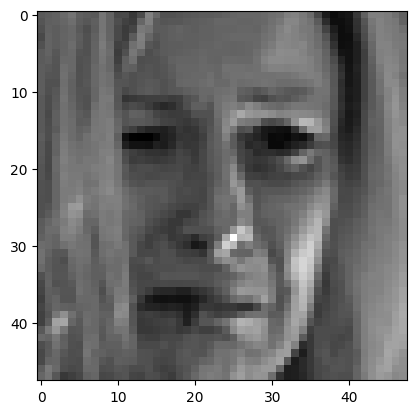

In [38]:
image = 'images/train/sad/im960.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
model prediction is  sad


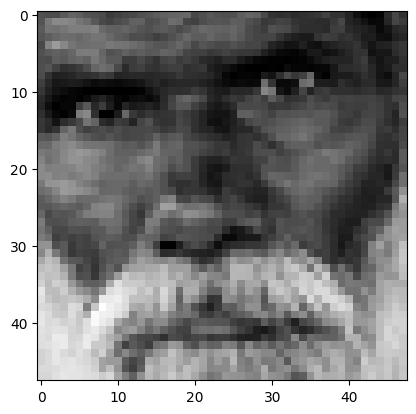

In [40]:
image = 'images/train/sad/im42.png'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
model prediction is  fear


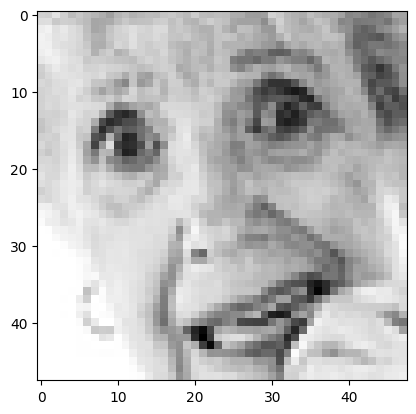

In [41]:
image = 'images/train/fearful/im892.png'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of disgust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
model prediction is  disgust


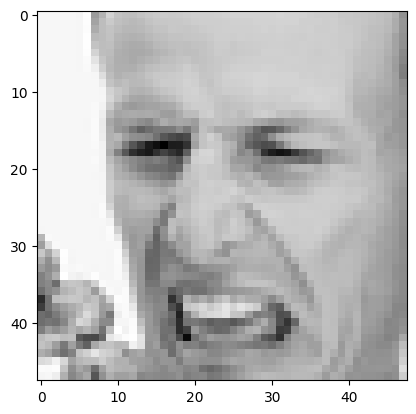

In [49]:
image = 'images/train/disgusted/im424.png'
print("original image is of disgust")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
model prediction is  happy


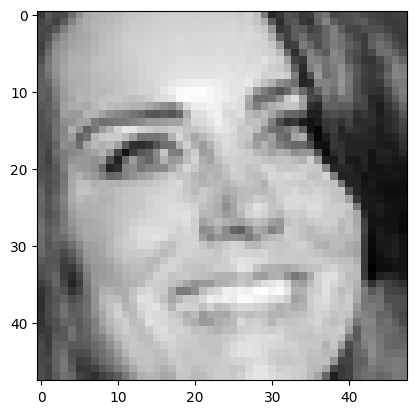

In [48]:
image = 'images/train/happy/im741.png'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
model prediction is  surprise


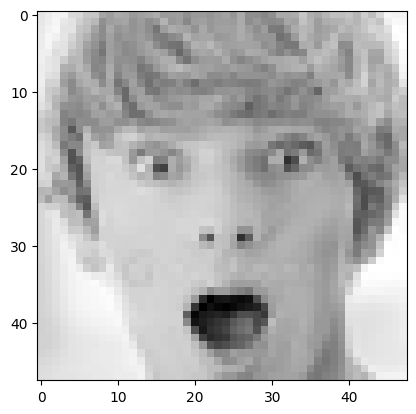

In [54]:
image = 'images/train/surprised/im984.png'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')